In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [5]:
df1= df

df1.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
from sklearn.preprocessing import RobustScaler

# Extract categorical and numerical columns from df1
cat_cols = df1.select_dtypes(include='object').columns.tolist()
num_cols = df1.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Drop 'salary_in_usd' from df1 and perform one-hot encoding
df1 = pd.get_dummies(df1, columns=cat_cols, drop_first=True)
X = df1.copy()  # Make a copy of df1 for X
y = df1['salary_in_usd']

# Scale numerical columns using RobustScaler
scaler = RobustScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X.head()

,work_year,salary,salary_in_usd,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,...,company_location_SG,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
0,1.0,-0.72500,-0.614413,1.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,-1.35000,-1.312500,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1.0,-1.40625,-1.368750,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.0,0.46250,0.500000,1.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,-0.22500,-0.187500,1.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (3004, 271)
The shape of X_test is        (751, 271)
The shape of y_train is       (3004,)
The shape of y_test is        (751,)


In [8]:
# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.255659121171771


In [20]:
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid, train_test_split
import numpy as np
import time

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the object
svm = SVC()

# Set a grid - not so extensive
parameters = {"C": np.arange(1, 10, 1), 'gamma': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]}

# Calculate the total number of iterations
total_iterations = len(parameters["C"]) * len(parameters["gamma"])

# Fitting the object
start_time = time.time()  # Record the start time

best_accuracy = 0.0  # Initialize best accuracy
best_params = {}  # Initialize best parameters

with tqdm(total=total_iterations, desc="Grid Search Progress") as pbar:
    for param in ParameterGrid(parameters):
        svm.set_params(**param)  # Set the current parameter combination
        svm.fit(X_train, y_train)  # Fit the model
        y_pred = svm.predict(X_test)  # Predict on the test set
        accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
        
        # Update best accuracy and parameters if needed
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = param
        
        pbar.update()  # Update the progress bar

end_time = time.time()  # Record the end time

# Calculate the time taken
elapsed_time = end_time - start_time

# Print the best accuracy and parameters
print("Best accuracy:", best_accuracy)
print("Best parameters:", best_params)

# Print the elapsed time
print("Elapsed time:", elapsed_time, "seconds")

Grid Search Progress: 100%|██████████| 108/108 [17:02<00:00,  9.47s/it]

Best accuracy: 0.31025299600532624
Best parameters: {'C': 7, 'gamma': 5}
Elapsed time: 1022.8682060241699 seconds


In [11]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.7509986684420772


In [12]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.7509986684420772


In [ ]:
#takes way too long for some reason
"""from tqdm import tqdm
import time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators=100, max_depth=1, subsample=0.8, max_features=0.2, random_state=42)

# Fitting the model
start_time = time.time()  # Record the start time

# Create a tqdm progress bar with manual updates
with tqdm(total=gbt.n_estimators, desc="Training Progress") as pbar:
    for i in range(gbt.n_estimators):
        gbt.fit(X_train, y_train, sample_weight=None if i == 0 else gbt.init_.predict(X_train))  # Fit the model
        y_pred = gbt.predict(X_test)  # Predict on the test set
        accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
        pbar.update()  # Update the progress bar

end_time = time.time()  # Record the end time

# Calculate the time taken
elapsed_time = end_time - start_time

# Print the test accuracy score and elapsed time
print("The test accuracy score of Gradient Boosting Classifier is", accuracy)
print("Elapsed time:", elapsed_time, "seconds")"""

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
    'Cat Boost Regressor' : CatBoostRegressor(),
}

In [14]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 21.55863567999517
Mean Absolute Error (MAE): 0.469565414117756
R-squared Score: 0.999999994539062

Results for Decision Tree:
Mean Squared Error (MSE): 276941.6830892144
Mean Absolute Error (MAE): 104.24766977363515
R-squared Score: 0.9999298489294939

Results for Random Forest:
Mean Squared Error (MSE): 230126.30347483393
Mean Absolute Error (MAE): 100.25070572569899
R-squared Score: 0.9999417075596555

Results for SVR:
Mean Squared Error (MSE): 3941039435.982418
Mean Absolute Error (MAE): 48514.20609342593
R-squared Score: 0.0017099186480656892

Results for XGBoost:
Mean Squared Error (MSE): 442313.5628253829
Mean Absolute Error (MAE): 256.9367139387067
R-squared Score: 0.9998879591920384

Results for LightGBM:
Mean Squared Error (MSE): 3091348.559092503
Mean Absolute Error (MAE): 427.3523158679749
R-squared Score: 0.9992169419629838

Results for Gradient Boosting Regressor:
Mean Squared Error (MSE): 330880.9621287983
Mean Abso

In [15]:
accuracy

[0.999999994539062,
 0.9999298489294939,
 0.9999417075596555,
 0.0017099186480656892,
 0.9998879591920384,
 0.9992169419629838,
 0.999916185770793,
 0.990626817268846,
 0.9607348291159072,
 -3.487007972522955,
 0.9995578864456693]

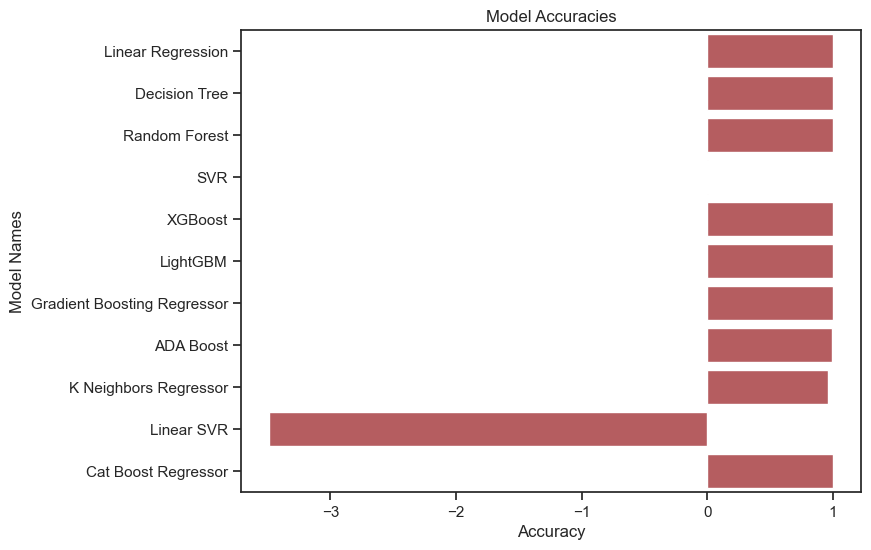

In [16]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="ticks")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="r")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()

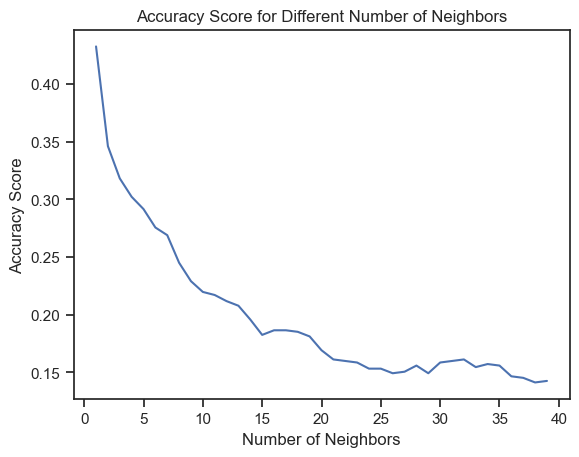

In [17]:
#create a function that checks for the best amount of neighbors
from sklearn.neighbors import KNeighborsClassifier
def check_neighbors(X_train, y_train, X_test, y_test, k):
    #create a list of scores
    scores = []
    #create a list of neighbors
    neighbors = []
    #create a for loop that goes through the range of k
    for i in range(1, k):
        #create a KNN classifier with the current k
        knn = KNeighborsClassifier(n_neighbors=i)
        #fit the model
        knn.fit(X_train, y_train)
        #append the score to the scores list
        scores.append(knn.score(X_test, y_test))
        #append the current k to the neighbors list
        neighbors.append(i)
    #return the scores and neighbors list
    return scores, neighbors

#call the function
scores, neighbors = check_neighbors(X_train, y_train, X_test, y_test, 40)

#plot the scores
plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Number of Neighbors')
plt.show()


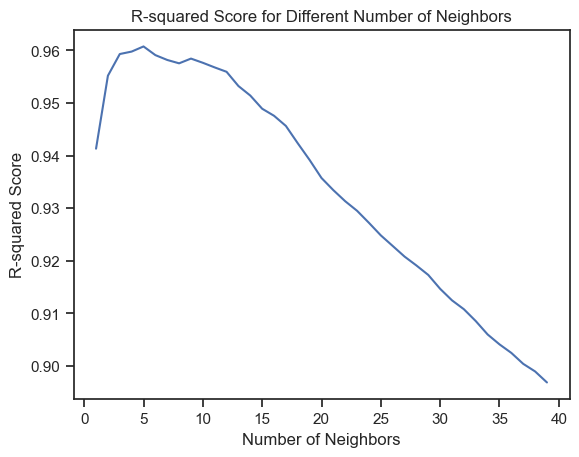

In [18]:
from sklearn.neighbors import KNeighborsRegressor

def check_neighbors(X_train, y_train, X_test, y_test, k):
    scores = []
    neighbors = []
    
    for i in range(1, k):
        knn = KNeighborsRegressor(n_neighbors=i)  # Use KNeighborsRegressor
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
        neighbors.append(i)
        
    return scores, neighbors

scores, neighbors = check_neighbors(X_train, y_train, X_test, y_test, 40)
plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('R-squared Score')  # Since it's a regression task
plt.title('R-squared Score for Different Number of Neighbors')
plt.show()